# COVID-19 in Australia (from covidlive.com.au)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span><ul class="toc-item"><li><span><a href="#Usual-imports-etc." data-toc-modified-id="Usual-imports-etc.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Usual imports etc.</a></span></li><li><span><a href="#Other-useful-information" data-toc-modified-id="Other-useful-information-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other useful information</a></span></li><li><span><a href="#Warnings" data-toc-modified-id="Warnings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Warnings</a></span></li><li><span><a href="#State-populations-and-per-capita-calculations" data-toc-modified-id="State-populations-and-per-capita-calculations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>State populations and per capita calculations</a></span></li></ul></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Capture-cumulative-and-daily-data-for-selected-columns" data-toc-modified-id="Capture-cumulative-and-daily-data-for-selected-columns-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Capture cumulative and daily data for selected columns</a></span></li><li><span><a href="#Weekly-charts" data-toc-modified-id="Weekly-charts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Weekly charts</a></span></li><li><span><a href="#Bar-Charts" data-toc-modified-id="Bar-Charts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bar Charts</a></span></li><li><span><a href="#Active-Cases" data-toc-modified-id="Active-Cases-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Active Cases</a></span><ul class="toc-item"><li><span><a href="#Bar-chart-of-active-cases" data-toc-modified-id="Bar-chart-of-active-cases-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Bar chart of active cases</a></span></li><li><span><a href="#Active-cases---line-plots" data-toc-modified-id="Active-cases---line-plots-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Active cases - line plots</a></span></li></ul></li><li><span><a href="#Source-of-infection" data-toc-modified-id="Source-of-infection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Source of infection</a></span></li><li><span><a href="#Local-cases---speculative" data-toc-modified-id="Local-cases---speculative-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Local cases - speculative</a></span><ul class="toc-item"><li><span><a href="#Create-dataframe-of-local-tranmission" data-toc-modified-id="Create-dataframe-of-local-tranmission-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Create dataframe of local tranmission</a></span></li><li><span><a href="#Bar-charts-cumulative-local-transmission" data-toc-modified-id="Bar-charts-cumulative-local-transmission-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Bar charts cumulative local transmission</a></span></li><li><span><a href="#Weekly-charts-for-local-transmission" data-toc-modified-id="Weekly-charts-for-local-transmission-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Weekly charts for local transmission</a></span></li><li><span><a href="#Recent-local-transmission-daily-charts" data-toc-modified-id="Recent-local-transmission-daily-charts-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Recent local transmission daily charts</a></span></li><li><span><a href="#Compare-Sydney-and-Melbourne-outbreaks" data-toc-modified-id="Compare-Sydney-and-Melbourne-outbreaks-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Compare Sydney and Melbourne outbreaks</a></span></li></ul></li><li><span><a href="#Hospitalised" data-toc-modified-id="Hospitalised-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Hospitalised</a></span></li><li><span><a href="#The-End" data-toc-modified-id="The-End-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Python set-up

### Usual imports etc.

In [1]:
# global imports
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.units as munits
import matplotlib.dates as mdates
import datetime

from pathlib import Path
from typing import Dict, List

# local imports
sys.path.append(r'../bin')
import plotstuff as ps
import Henderson

#pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting
plt.style.use('ggplot')
#%matplotlib inline

# matplotlib stuff for date formatting xticklabels
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

### Other useful information

In [2]:
# save location
CHART_DIRECTORY = '../charts'
Path(CHART_DIRECTORY).mkdir(parents=True, exist_ok=True)
CHART_DIRECTORY += '/!AS2-'

SOURCE = 'Source: https://covidlive.com.au/'

AU_COLOURS = ['#dd0000', 'darkorange', 'gold', 'seagreen',
              'dodgerblue', 'blue', 'mediumorchid', 'hotpink',
              '#555555']  


# used in charts of the recent period
RECENT = 62 # days

### Warnings

In [3]:
warning_count = 0
warnings = []

def warn(message: str) -> None:
    if message:
        print(message)
        warnings.append(message)
    global warning_count
    warning_count += 1
    return None

def print_warinings() -> None:
    for m in warnings:
        print(m)
    return None

### State populations and per capita calculations

In [4]:
# Constants across all tests
state_pop = {
    # source: https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/latest-release
    # population at 30 June 2020
    'NSW':        8_164_100,
    'Victoria':   6_694_900,
    'Queensland': 5_174_400,
    'SA':         1_769_300,
    'WA':         2_661_900,
    'Tasmania':     540_600,
    'ACT':          431_100,
    'NT':           246_000,
}
au_population = sum(state_pop.values())
print(f'Australian population: {au_population:,}')
state_pop['Australia'] = au_population

# per capita ...
power = 6
power_conversion = {
    0:  'Unit',
    3:  'Thousand',
    6:  'Million', # beyond here is a bit silly ...
    9:  'Billion', 
    12: 'Trillion',
    15: 'Quadrillion',
    18: 'Quintillion',
}
if power not in power_conversion.keys():
    power = 6
power_text = power_conversion[power]
factor = 10 ** power
state_pop = pd.Series(state_pop) / factor

Australian population: 25,682,300


## Get the data

In [5]:
def get_data_from_JSON():
    """ Get the latest data from covidlive.com.au
        Return a tuple containing (0) a dictionary of dataframes, 
        one dataframe for each state, and (1) the complete 
        DataFrame downloaded from covidlive.com.au"""
    
    # get the data
    url = 'https://covidlive.com.au/covid-live.json'
    all_frame = pd.read_json(url)
    
    # issue a warning if records exist ahead of today
    today = str(datetime.datetime.now().date())
    if (all_frame.REPORT_DATE > today).any():
        warn(f'Warning: there are records into the future?')
        all_frame = all_frame[all_frame.REPORT_DATE <= today]

    # convert to times
    all_frame.REPORT_DATE = pd.to_datetime(all_frame.REPORT_DATE)
        
    # return
    return all_frame

# obtain the latest data ...
frame_data = get_data_from_JSON()

In [6]:
# Quick peak at the data columns
frame_data.columns

Index(['REPORT_DATE', 'LAST_UPDATED_DATE', 'CODE', 'NAME', 'CASE_CNT',
       'TEST_CNT', 'DEATH_CNT', 'RECOV_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT',
       'MED_HOSP_CNT', 'SRC_OVERSEAS_CNT', 'SRC_INTERSTATE_CNT',
       'SRC_CONTACT_CNT', 'SRC_UNKNOWN_CNT', 'SRC_INVES_CNT', 'PREV_CASE_CNT',
       'PREV_TEST_CNT', 'PREV_DEATH_CNT', 'PREV_RECOV_CNT', 'PREV_MED_ICU_CNT',
       'PREV_MED_VENT_CNT', 'PREV_MED_HOSP_CNT', 'PREV_SRC_OVERSEAS_CNT',
       'PREV_SRC_INTERSTATE_CNT', 'PREV_SRC_CONTACT_CNT',
       'PREV_SRC_UNKNOWN_CNT', 'PREV_SRC_INVES_CNT', 'PROB_CASE_CNT',
       'PREV_PROB_CASE_CNT', 'ACTIVE_CNT', 'PREV_ACTIVE_CNT', 'NEW_CASE_CNT',
       'PREV_NEW_CASE_CNT', 'VACC_DIST_CNT', 'PREV_VACC_DIST_CNT',
       'VACC_DOSE_CNT', 'PREV_VACC_DOSE_CNT', 'VACC_PEOPLE_CNT',
       'PREV_VACC_PEOPLE_CNT', 'VACC_AGED_CARE_CNT', 'PREV_VACC_AGED_CARE_CNT',
       'VACC_GP_CNT', 'PREV_VACC_GP_CNT'],
      dtype='object')

## Capture cumulative and daily data for selected columns

In [7]:
def get_table(frame_data, column):
    
    table = (
        frame_data
        .pivot(index='REPORT_DATE', columns='NAME', values=column)
        .sort_index(ascending=True)
    )
    
    # check if missing values in last row ...
    situation = table.iloc[-1].isna() & table.iloc[-2].notna()
    if situation.sum():
        warn(f'It looks like we might be missing the latest {column} '
             f'for {situation[situation].index.to_list()}')

    return (table)

In [8]:
capture_list = ['VACC_DOSE_CNT', 'VACC_PEOPLE_CNT',
                'CASE_CNT', 'TEST_CNT', 'DEATH_CNT']
capture_desc=['vacc doses', 'vacc people', 'cases', 'tests', 'deaths']

cum_u = {}
daily_u = {}
daily_c = {}
cum_c = {}

for item in capture_list:
    # cimulative totals uncorrected
    cum_u[item] = (
        get_table(frame_data, item)
        .replace({0: np.nan})
        .ffill()
        .fillna(0)
        .astype(int)
    )
    
    # adjusted caily and cumulative data (for corrections)
    daily_u[item], daily_c[item], cum_c[item] = (
        ps.dataframe_correction(cum_u[item], verbose=False))
    

It looks like we might be missing the latest TEST_CNT for ['SA', 'WA']


## Weekly charts

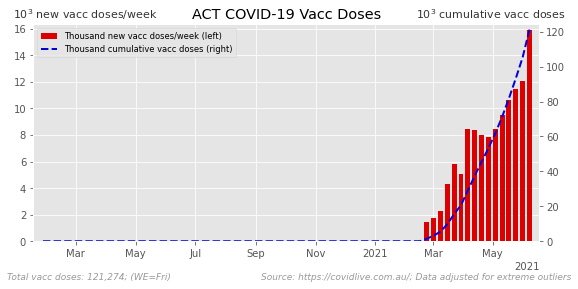

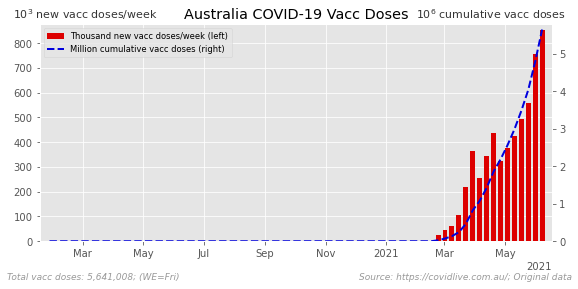

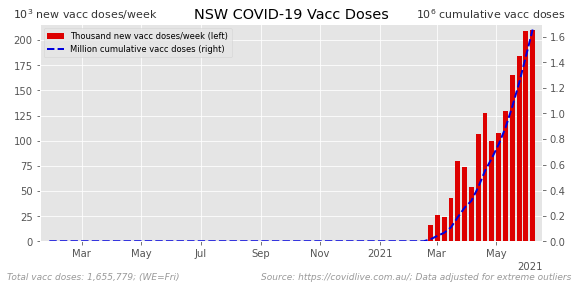

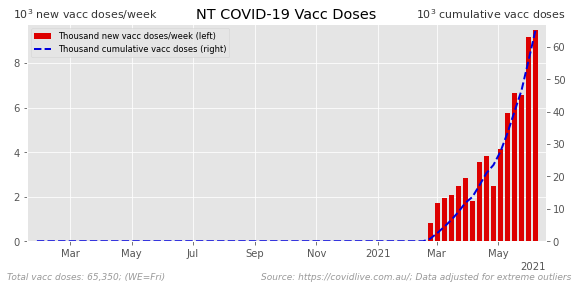

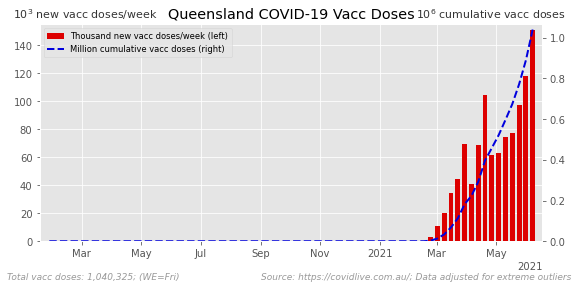

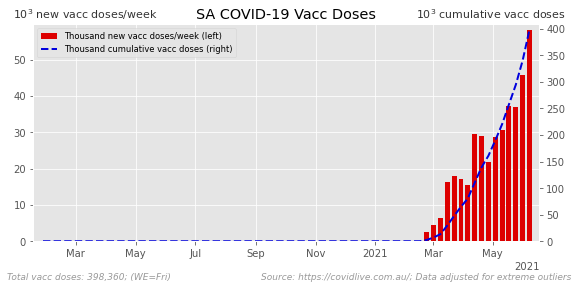

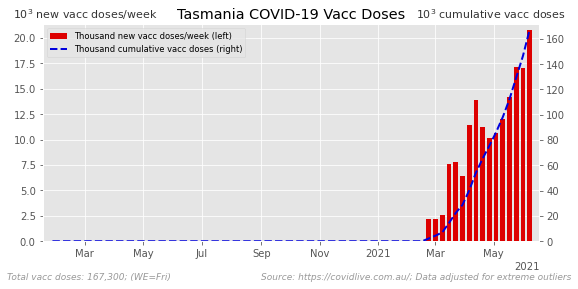

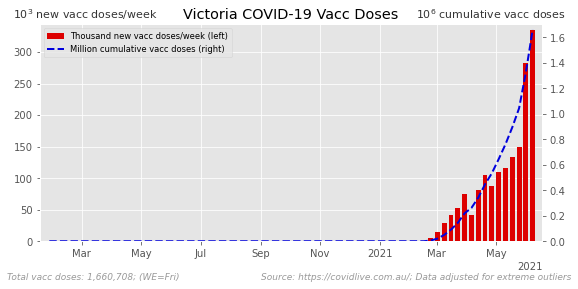

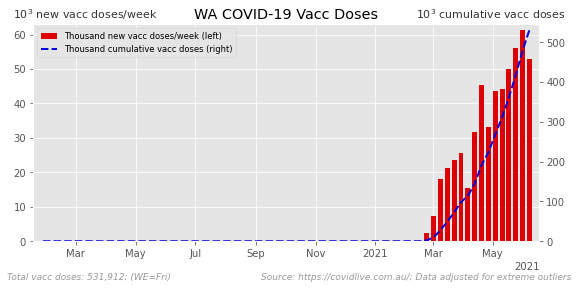

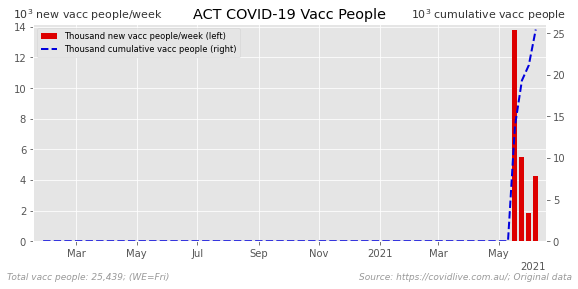

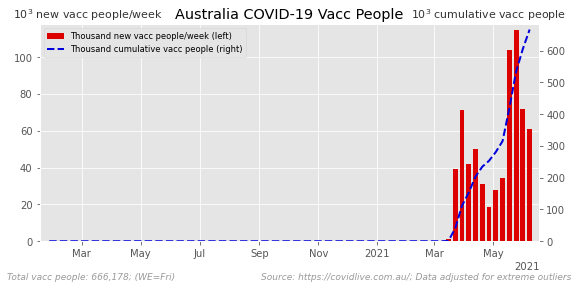

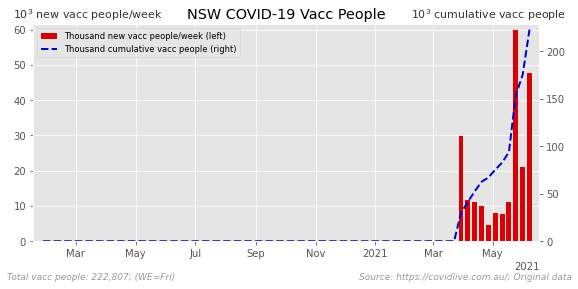

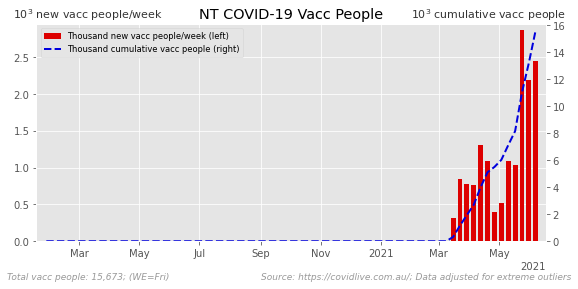

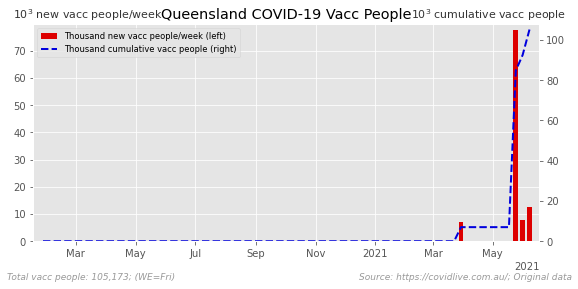

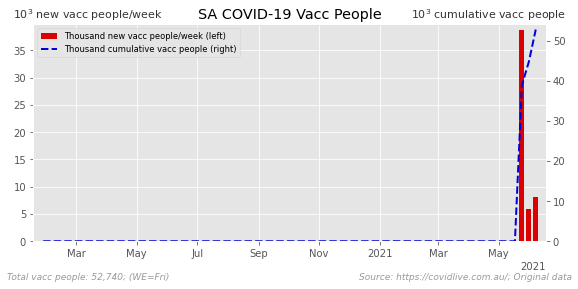

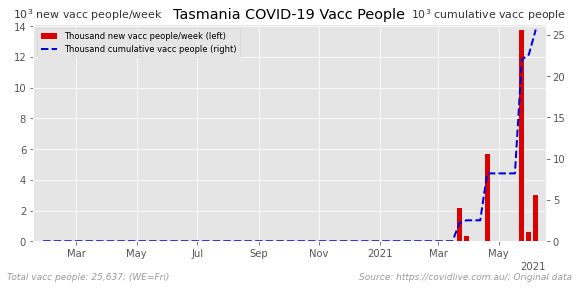

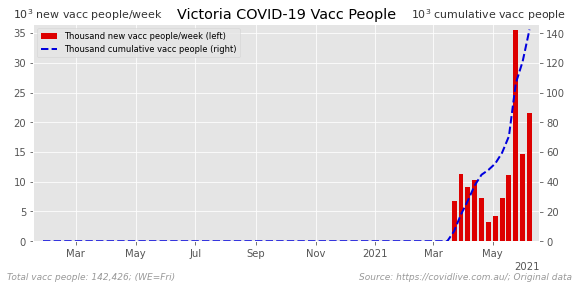

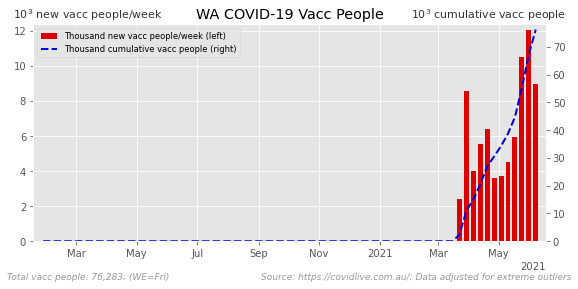

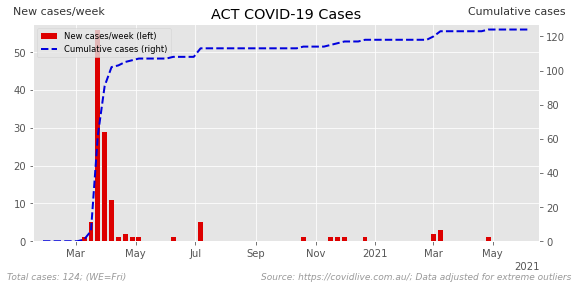

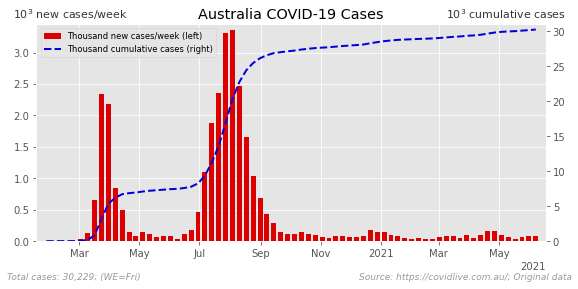

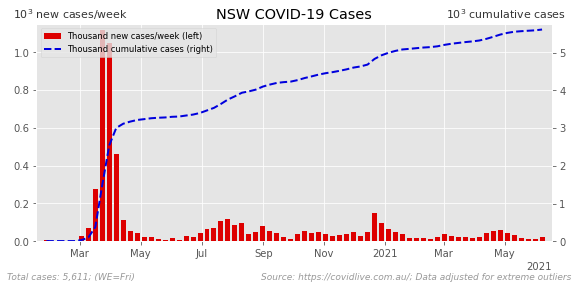

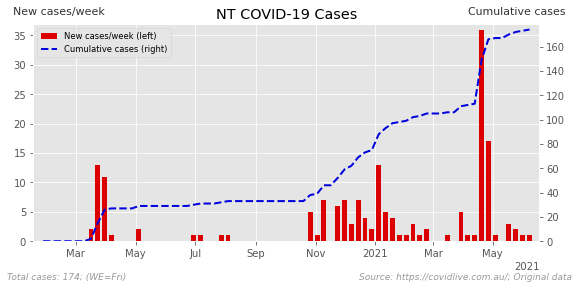

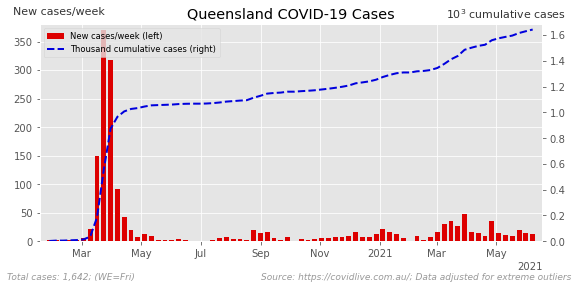

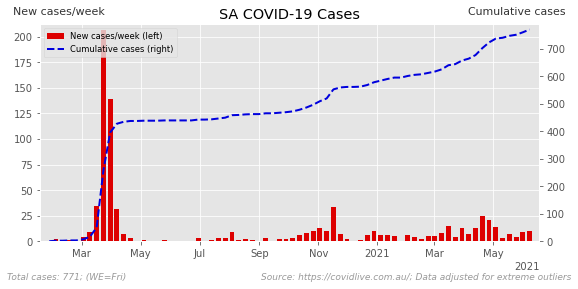

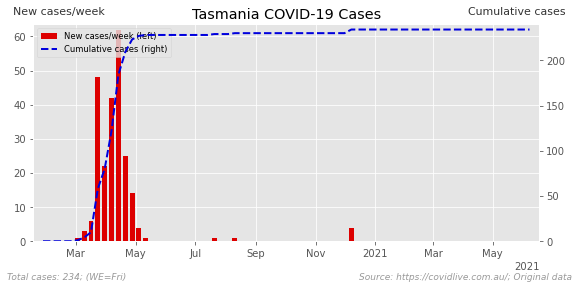

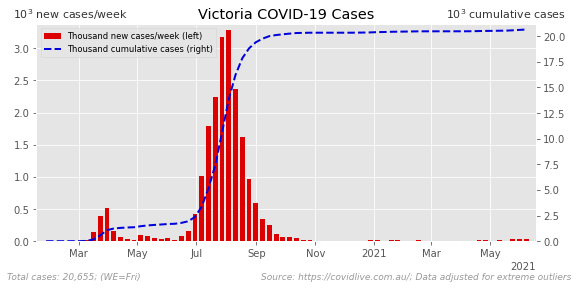

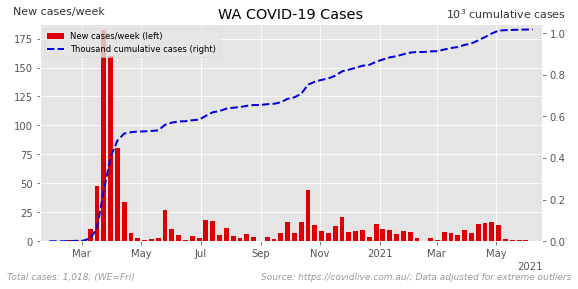

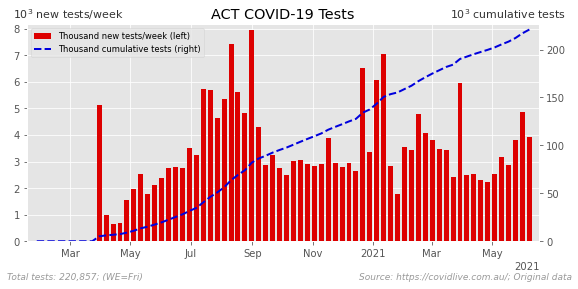

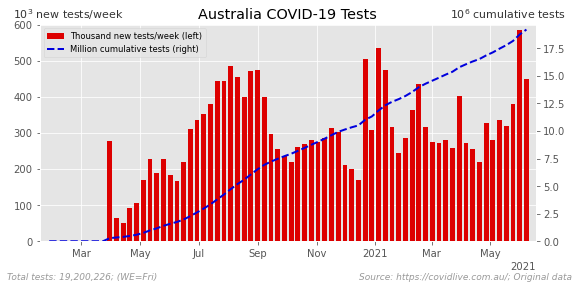

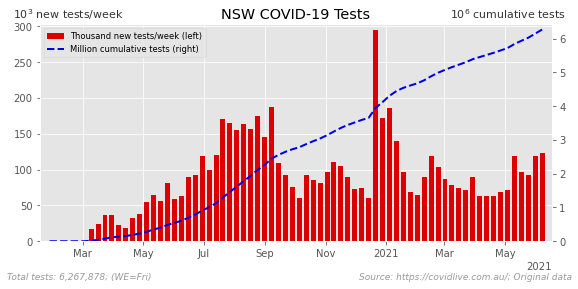

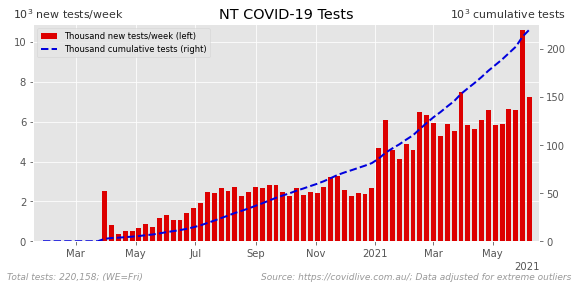

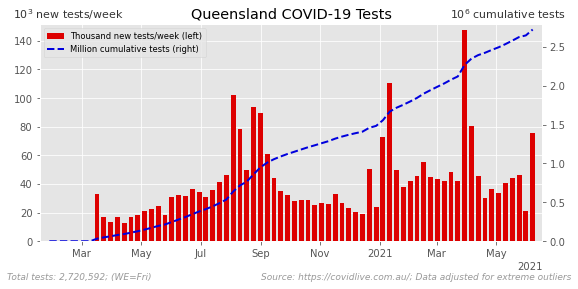

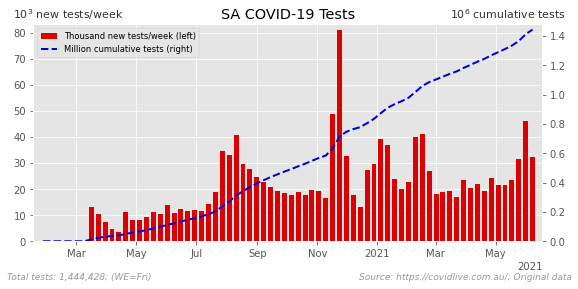

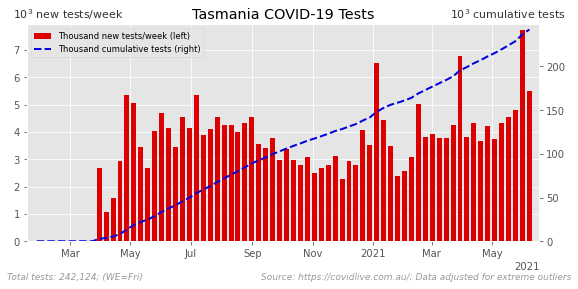

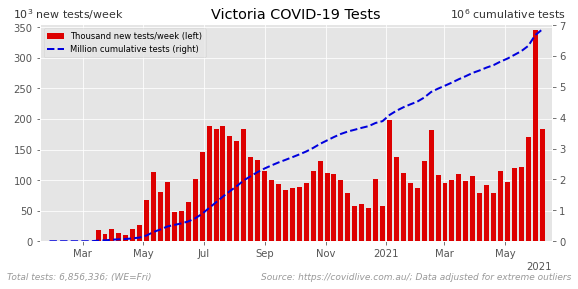

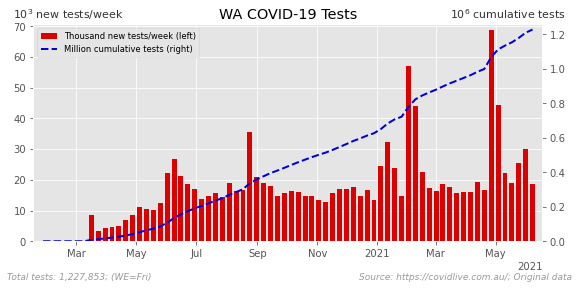

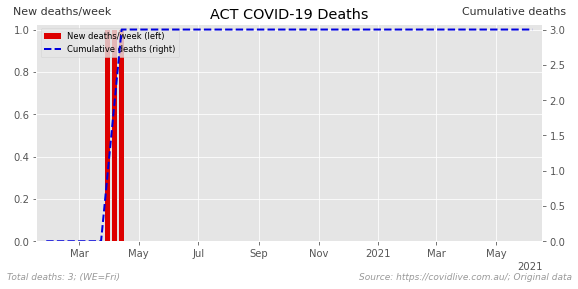

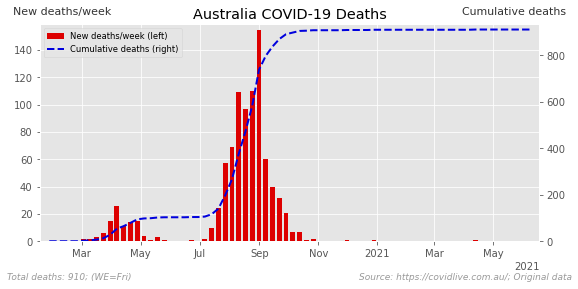

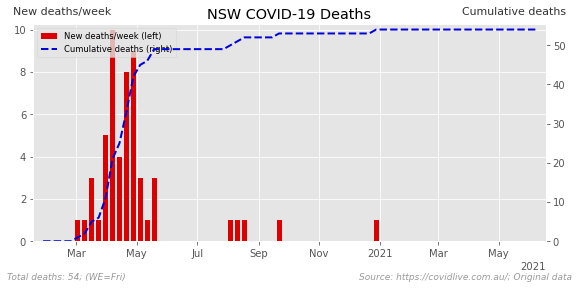

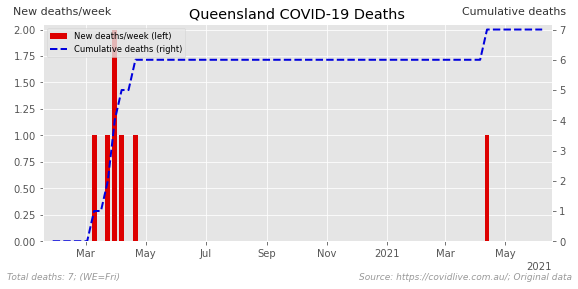

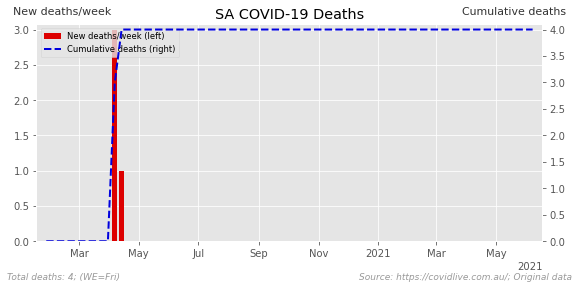

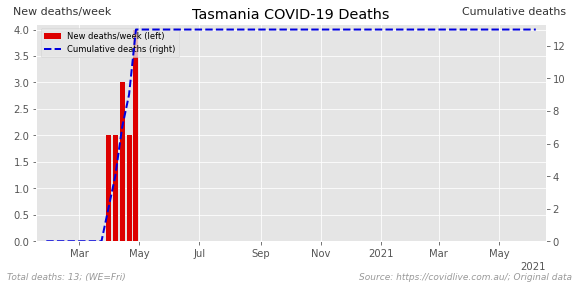

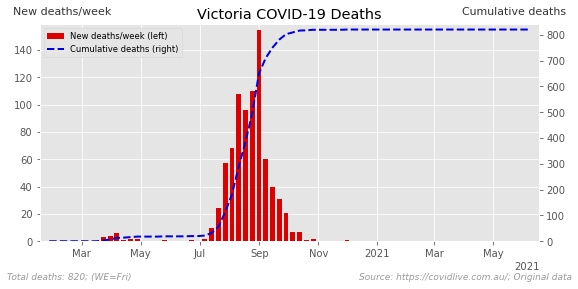

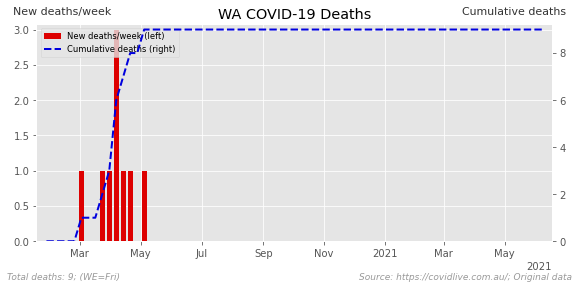

In [9]:
for item, desc in zip(capture_list, capture_desc):
    
    quality = pd.Series(dtype=str)
    for state in daily_u[item].columns:
        if (daily_u[item][state] == daily_c[item][state]).all():
            quality[state] = f'{SOURCE}; Original data'
        else:
            quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'
    
    _ = ps.plot_weekly(
                       daily_c[item], desc, quality, 
                       chart_directory=CHART_DIRECTORY+'-!weekly-',
                       show=True,
                      )

## Bar Charts

In [10]:
def two_bar_plots(data_dict, item, prefix, desc):
    """latest cumulative and cumulative per population charts"""
    
    last_row = data_dict[item].iloc[-1].sort_values()
    #last_row = last_row[last_row > 0]
    if not len(last_row):
        # no data to plot
        return None
    date = data_dict[item].index[-1].ctime()[:10]
    
    for extra in '', f' per {power_text.lower()} population':
        ps.plot_barh(last_row, 
                     title=f'{prefix} COVID19 {desc}{extra}'.strip(),
                     save_as = f'{CHART_DIRECTORY}!bar-chart-{prefix}-{desc}-{extra}.png',
                     rfooter=SOURCE + ' ' + date,
                     show=True,
                    )
        
        # per capita second time round ...
        last_row = (last_row / state_pop).round(1).sort_values()

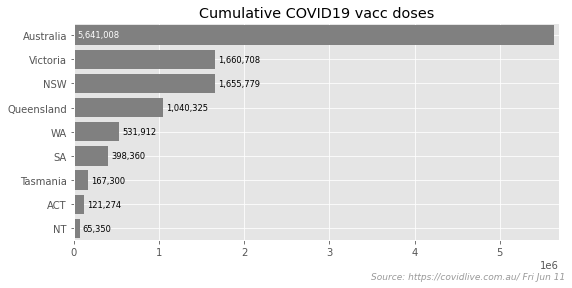

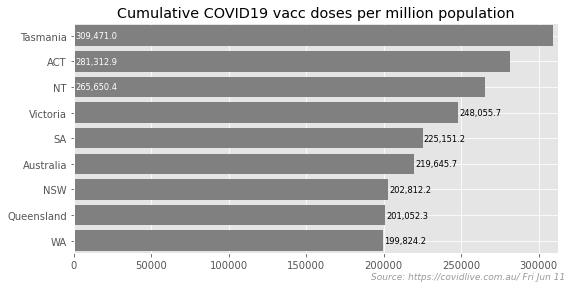

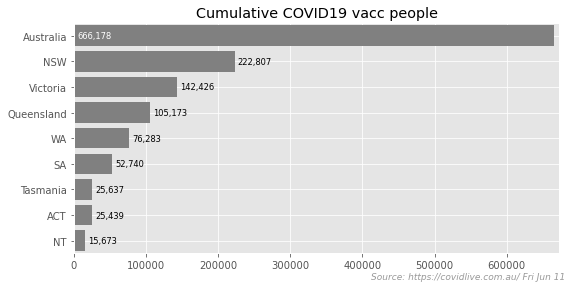

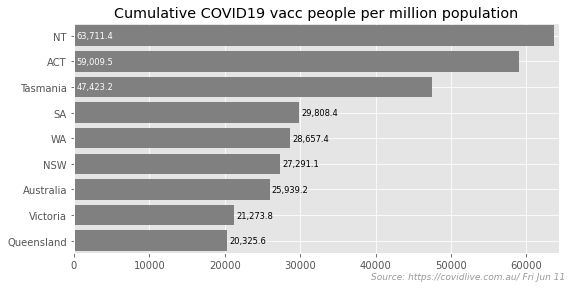

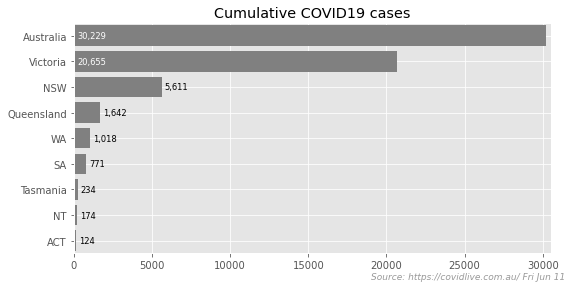

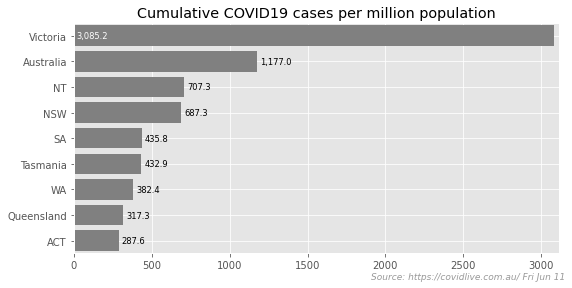

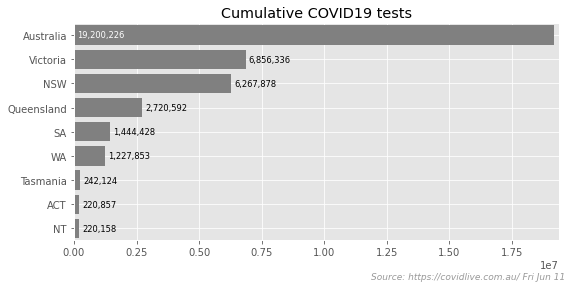

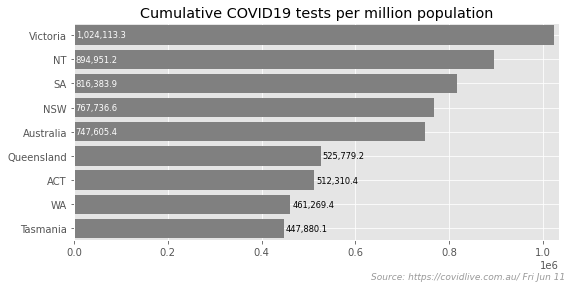

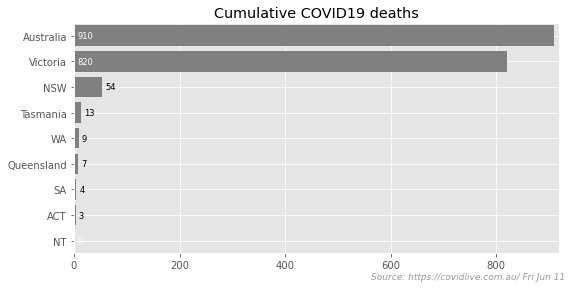

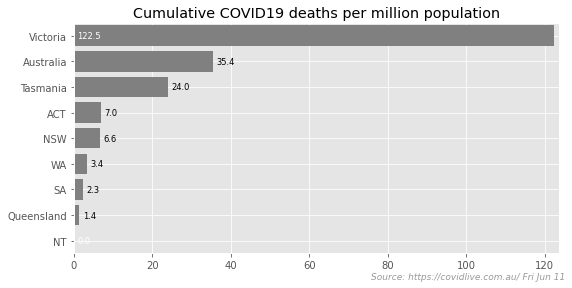

In [11]:
for item, desc in zip(capture_list, capture_desc):
    two_bar_plots(cum_u, item, 'Cumulative', desc)

## Active Cases

In [12]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)

In [13]:
item = 'ACTIVE_CNT'
active_all = (
    get_table(frame_data, item)
    .dropna(axis=0, how='all')
    .fillna(0)
    .astype(int)
)

### Bar chart of active cases

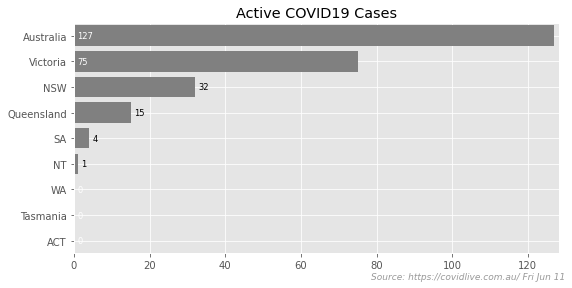

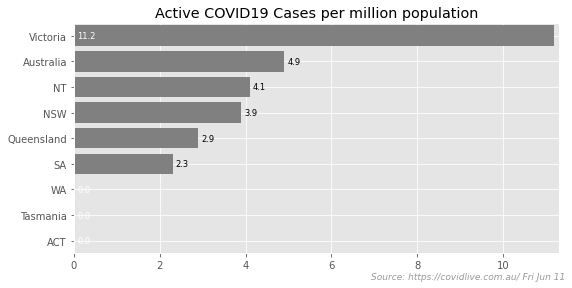

In [14]:
# bar chart of latest active cases
a_dict = {'active': active_all}
two_bar_plots(a_dict, 'active', 'Active', 'Cases')

### Active cases - line plots

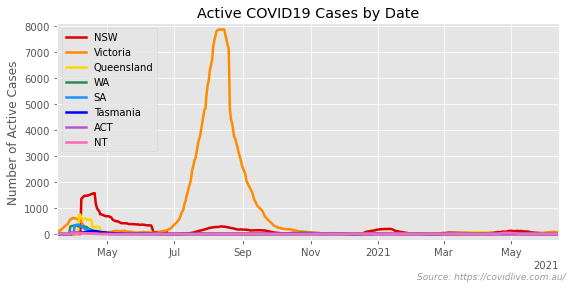

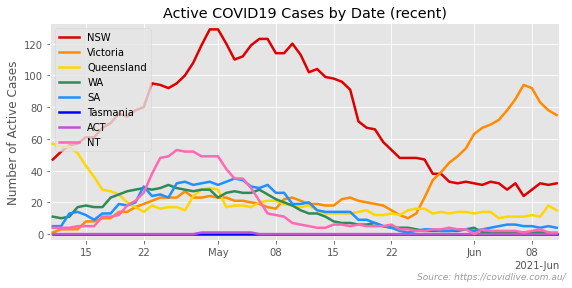

In [15]:
# line plots of trajectories
if 'Australia' in active_all.columns:
    del active_all['Australia']
order = ['NSW', 'Victoria', 'Queensland', 
         'WA', 'SA', 'Tasmania', 'ACT', 'NT']
title = 'Active COVID19 Cases by Date'
MARGINS = (0.005, 0.03)
for recent in [0, RECENT]:
    data = active_all.iloc[-recent:]

    fig, ax = plt.subplots()
    ax.xaxis_date()
    for state in order:
        ax.plot(active_all.index[-recent:].values, 
            active_all[state].iloc[-recent:], 
            label=state, lw=2.5)
    ax.margins(*MARGINS)
    ax.legend(loc='upper left')
    title_extra = ''
    if recent > 0:
        title_extra = ' (recent)'
    
    ps.finalise_plot(ax, title=title+title_extra, 
                     xlabel=None,
                     chart_directory=CHART_DIRECTORY,
                     ylabel='Number of Active Cases',
                     rfooter=SOURCE,
                     show=True,
                    )

## Source of infection

In [16]:
# build a dictionary of dataframes for infection source data
names = {
    'SRC_OVERSEAS_CNT':   'Overseas',
    'SRC_INTERSTATE_CNT': 'Interstate',
    'SRC_CONTACT_CNT':    'Known contact',
    'SRC_UNKNOWN_CNT':    'Unknown contact',
    'SRC_INVES_CNT':      'Investigating',
}
# check we have all possible sources ...
assert((frame_data.columns.str[:3] == 'SRC').sum() == len(names))
sources = list(names.keys()) + ['REPORT_DATE']

state_SOI_data = {}
for state in frame_data.NAME.unique():
    df = (
        frame_data[frame_data.NAME == state][sources]
        .copy()
        .set_index('REPORT_DATE')
        .sort_index(ascending=True)
        .dropna(axis=0, how='all') # remove empty rows
    )
    
    problematic = df.iloc[-1].isna()
    if problematic.any(): # remove last row if partially complete
        warn(f'Possibly missing {state} data: '
             f'{problematic[problematic].index.to_list()}')
        df.drop(df.tail(1).index, inplace=True)
        
    df = df.rename(columns=names)
    state_SOI_data[state] = df

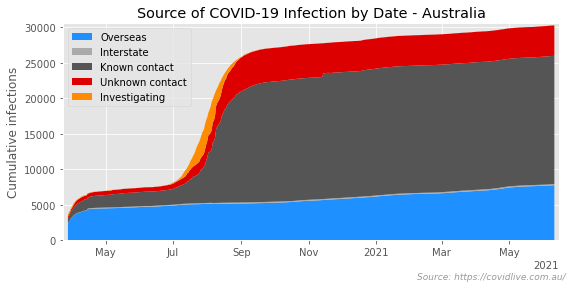

In [17]:
# plot time series of national totals
serious_colours = ['dodgerblue', '#aaaaaa', '#555555', '#dd0000', 'darkorange',]
assert(len(serious_colours) == len(names)) # check we have the right number of colours
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)
national_soi = state_SOI_data['Australia']

labels = list(names.values())
args = [national_soi[name] for name in labels]
fig, ax = plt.subplots()
ax.stackplot(national_soi.index, *args, labels=labels)
ax.legend(loc='upper left')
ax.margins(0.01)

title = 'Source of COVID-19 Infection by Date - Australia'
ps.finalise_plot(ax, title=title, 
                 chart_directory=CHART_DIRECTORY,
                 xlabel=None, ylabel='Cumulative infections',
                 rfooter=SOURCE,
                 show=True,
                )

In [18]:
# extract the latest data, and under investigation
states = list(frame_data.NAME.unique())
states.remove('Australia')
latest = pd.DataFrame()
investigating = pd.DataFrame()
for state in states:
    df = state_SOI_data[state].sort_index()
    df = df.dropna(axis=0, how='all')
    investigating[state] = df['Investigating']
    latest[state] = df.iloc[-1]
    if latest[state].isna().any():
        warn(f'Warning: data not current for {state}')
        print(latest[state][latest[state].isna()])
        latest[state] = df.iloc[-2]
        
latest

,NSW,Victoria,Queensland,WA,SA,Tasmania,ACT,NT
Overseas,3426.0,1153.0,1312.0,910.0,584.0,85.0,95.0,170.0
Interstate,90.0,0.0,25.0,7.0,26.0,3.0,3.0,2.0
Known contact,1644.0,15734.0,264.0,87.0,152.0,141.0,25.0,2.0
Unknown contact,451.0,3766.0,41.0,14.0,9.0,5.0,1.0,0.0
Investigating,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


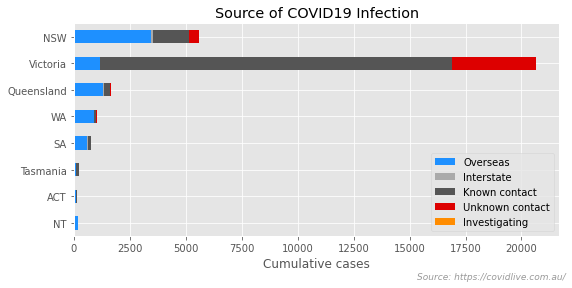

In [19]:
# plot the latest data
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)
ax = latest.T[::-1].plot.barh(stacked=True)
title = 'Source of COVID19 Infection'
ps.finalise_plot(ax, title=title, 
                 chart_directory=CHART_DIRECTORY,
                 xlabel='Cumulative cases', ylabel=None,
                 rfooter=SOURCE,
                 show=True,
                )

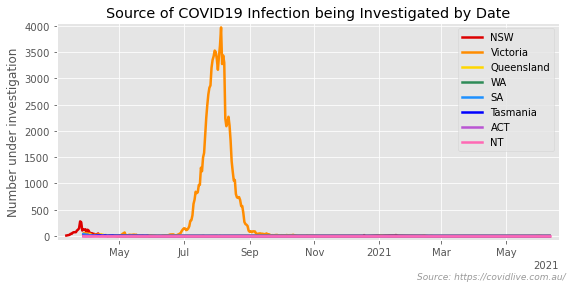

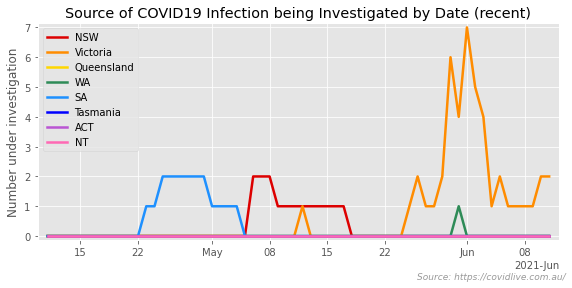

In [20]:
# plot under investigation
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)
for recent in [0, RECENT]:
    fig, ax = plt.subplots()
    ax.margins(0.02)
    for state in investigating.columns:
        ax.plot(investigating.index[-recent:],
                investigating[state].iloc[-recent:],
                lw=2.5, label=state)
    ax.legend(loc='best')
    title = 'Source of COVID19 Infection being Investigated by Date'
    plus = ''
    if recent > 0:
        plus = ' (recent)'

    ps.finalise_plot(ax, 
                     title=title+plus, 
                     chart_directory=CHART_DIRECTORY,
                     xlabel=None, ylabel='Number under investigation',
                     rfooter=SOURCE,
                     show=True,
                    )

## Local cases - speculative 
Note: calculated using the source of infection data

### Create dataframe of local tranmission

In [21]:
# definition of local (Australian) transmission
local_trans = ['Interstate', 'Known contact', 'Unknown contact', 'Investigating',]
local = 'LOCAL_TRANS'

# calculate from from Sourse of Infection data collected above
local_trans_df = pd.DataFrame()
for state in state_SOI_data:
    local_trans_df[state] = state_SOI_data[state][local_trans].sum(axis=1)
cum_u[local] = (
    local_trans_df
    .sort_index(ascending=True)
    .replace({0: np.nan})
    .ffill()
    .fillna(0)
    .astype(int)
)

# usual corrections
daily_u[local], daily_c[local], cum_c[local] = (
    ps.dataframe_correction(cum_u[local], verbose=False)
)

### Bar charts cumulative local transmission

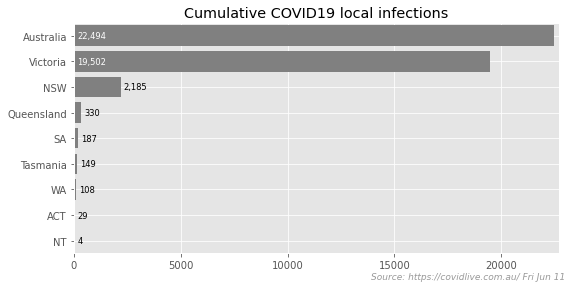

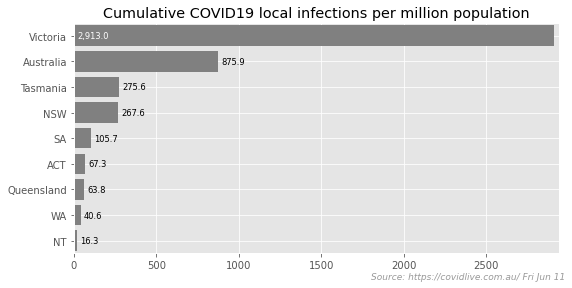

In [22]:
two_bar_plots(cum_u, local, 'Cumulative', 'local infections')

### Weekly charts for local transmission

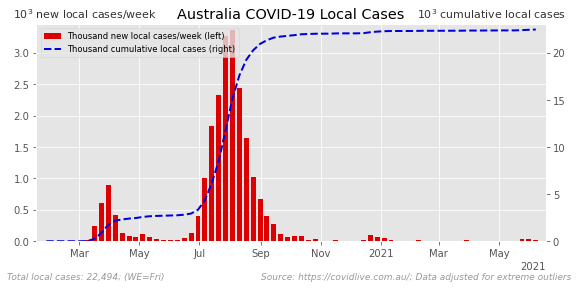

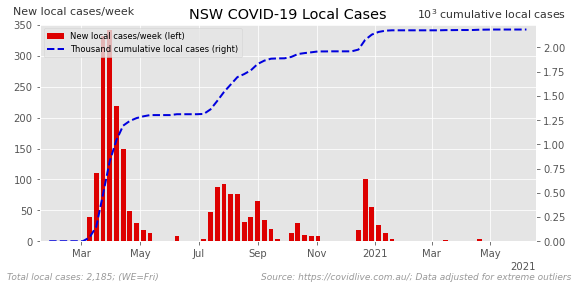

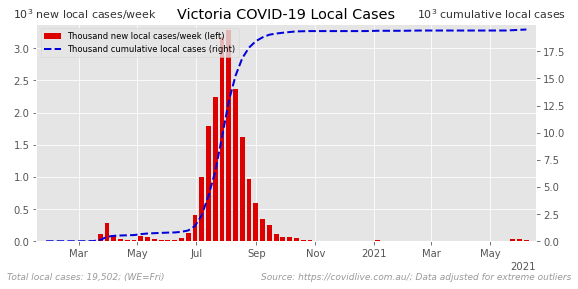

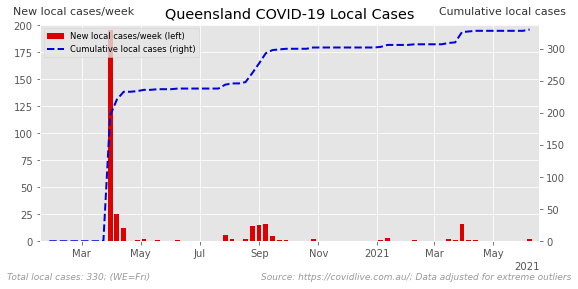

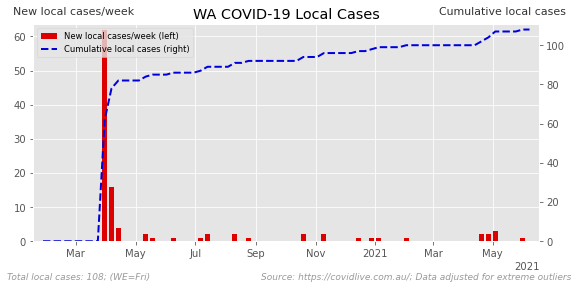

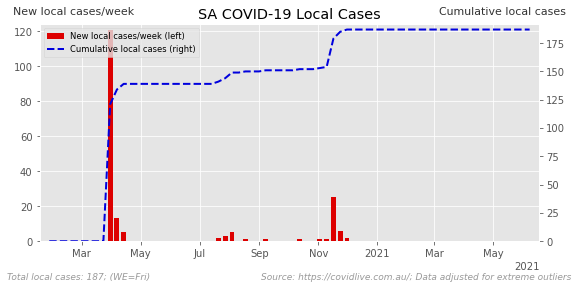

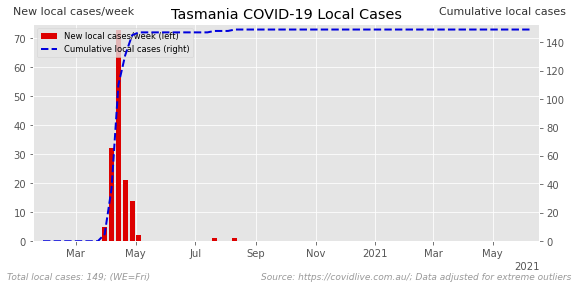

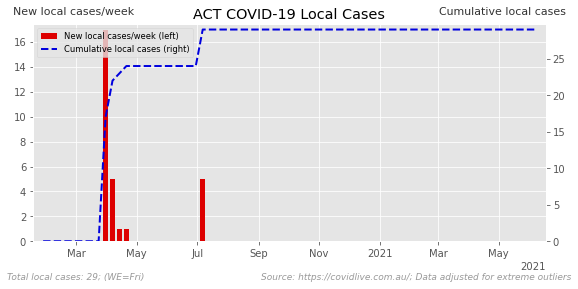

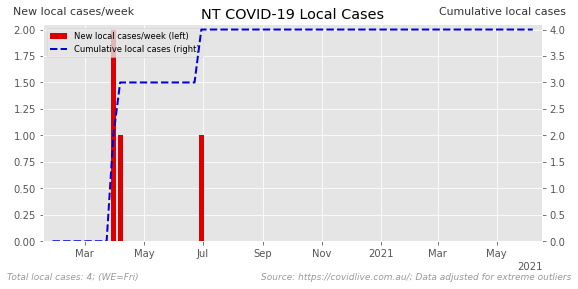

In [23]:
quality = pd.Series(dtype=str)
for state in daily_u[local].columns:
    if (daily_u[local][state] == daily_c[local][state]).all():
        quality[state] = f'{SOURCE}; Original data'
    else:
        quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'

desc = 'local cases'
_ = ps.plot_weekly(
    daily_c[local], desc, quality, 
    chart_directory=f'{CHART_DIRECTORY}-!{desc}-',
    show=True,
)

### Recent local transmission daily charts

In [24]:
local_lfooter = f'Local = {" + ".join(local_trans)}'

def recent_bar_with_ma_plot(df, mode):
    """plotting function - bar charts for daily local transmission,
       with 7 and 14 day moving averages."""
    
    # establish moving average periods
    MA1 = 7 # days
    MA2 = 14 # dats
    
    for col in df.columns:
        series = df[col]
        
        # bail if nothing to plot
        if series[-RECENT:].sum() <= 0: 
            continue
            
        # get plotables for recent period
        ma1 = series.rolling(MA1).mean()[-RECENT:]
        ma2 = series.rolling(MA2).mean()[-RECENT:]
        series = series[-RECENT:]
        
        # plot
        MARGINS = 0.015
        fig, ax = plt.subplots()
        ax.xaxis_date()
        ax.margins(MARGINS) # seems to work here
        ax.bar(series.index, series, label=mode, 
               color='#dd0000')
        ax.plot(ma1.index, ma1, label=f'{MA1} day ave.', 
                color='darkorange')
        ax.plot(ma2.index, ma2, label=f'{MA2} day ave.', 
                color='cornflowerblue')
        
        # annotate / finalise plot
        ax.legend(loc='best')
        title = (f'New Locally Acquired COVID19 {mode.title()} '
                 f'in {col} - Recent')
        ps.finalise_plot(ax, 
                         title=title, 
                         chart_directory=f"{CHART_DIRECTORY}-recent-local-",
                         xlabel=None,
                         ylabel=f'Daily New {mode.title()}',
                         lfooter=local_lfooter,
                         rfooter=SOURCE,
                         show=True,
                        )

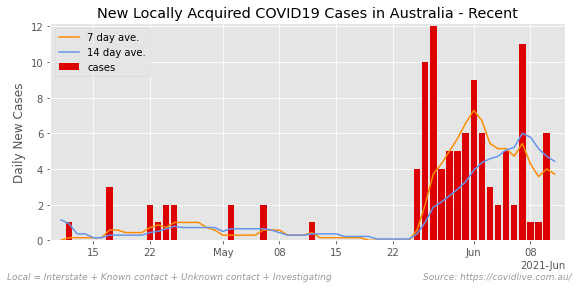

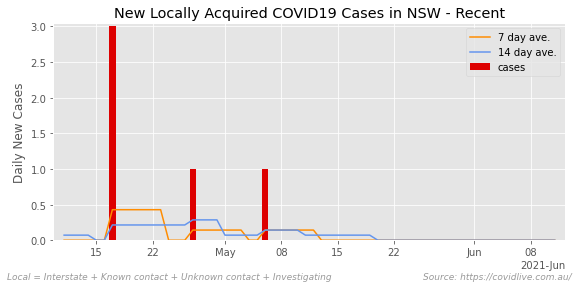

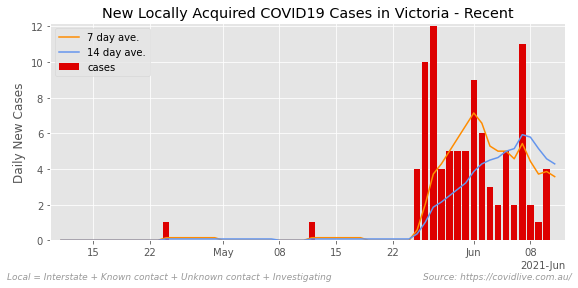

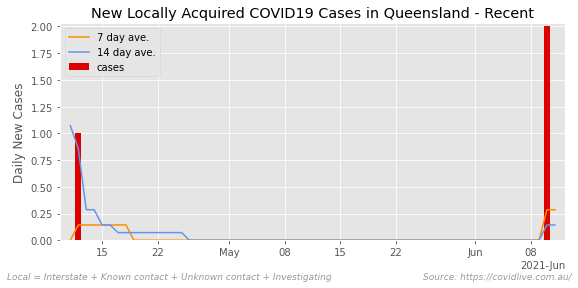

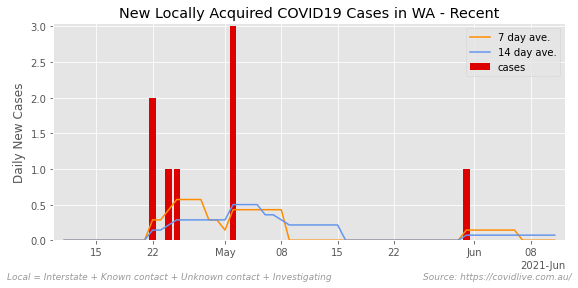

In [25]:
# and plot it
recent_bar_with_ma_plot(daily_c[local], "cases")

### Compare Sydney and Melbourne outbreaks

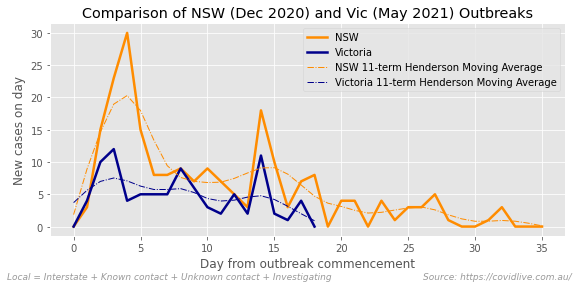

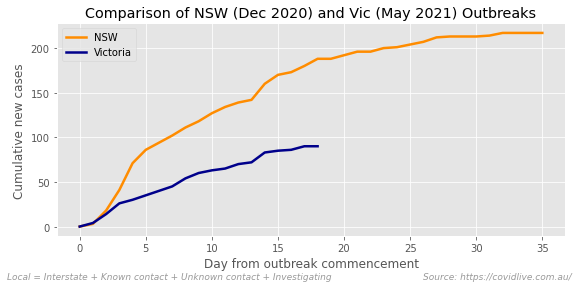

In [26]:
def select(state, start_date, span=36):
    series = daily_c[local][state]
    return (
        series[series.index >= pd.Timestamp(start_date)]
        .iloc[:span]
        .reset_index(drop=True)
    )

nsw = select('NSW', '2020-12-16')
vic = select('Victoria', '2021-05-24')
comparable = pd.DataFrame([nsw, vic]).T

y1 = 'New cases on day'
d1 = comparable
y2 = 'Cumulative new cases'
d2 = comparable.cumsum()

for ylabel, data in zip((y1, y2), (d1, d2)):
    ax = data.plot(color=['darkorange', 'darkblue'], lw=2.5)
    
    # add some moving averages to the daily chart
    if ylabel == y1:
        TERM = 11
        hma = pd.DataFrame()
        for col in data.columns:
            hma[col] = Henderson.Henderson(data[col].dropna(), TERM)
        hma.columns = hma.columns + f' {TERM}-term Henderson Moving Average'
        hma.plot(color=['darkorange', 'darkblue'], lw=1, ls='-.', ax=ax)
    
    title = f'Comparison of NSW (Dec 2020) and Vic (May 2021) Outbreaks'
    ps.finalise_plot(ax,
                 title=title, 
                 chart_directory=f"{CHART_DIRECTORY}",
                 ylabel=ylabel,
                 xlabel=f'Day from outbreak commencement',
                 save_tag=ylabel.split()[0],
                 lfooter=local_lfooter,
                 rfooter=SOURCE,
                 show=True,
    )

## Hospitalised

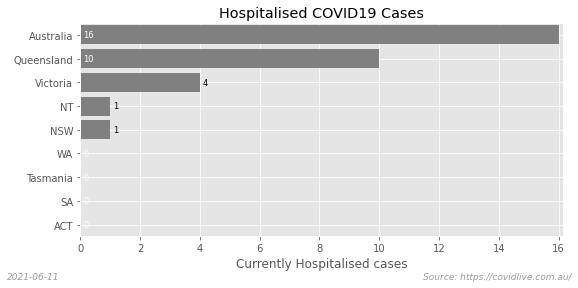

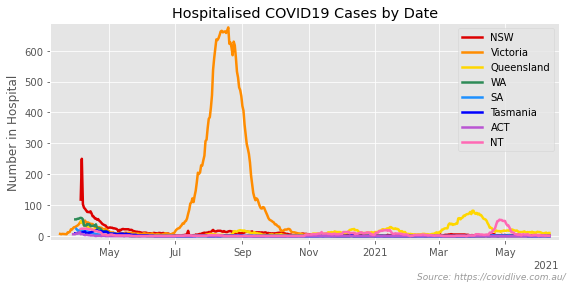

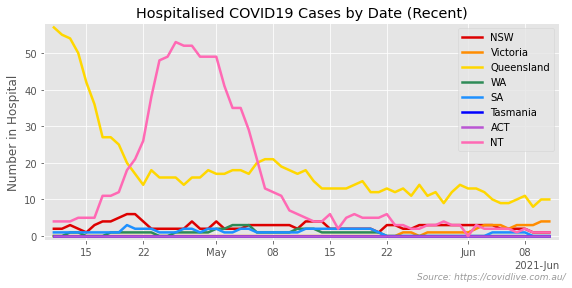

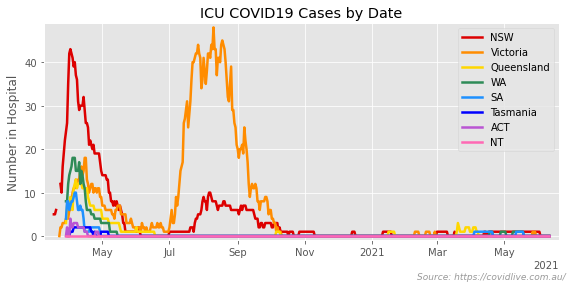

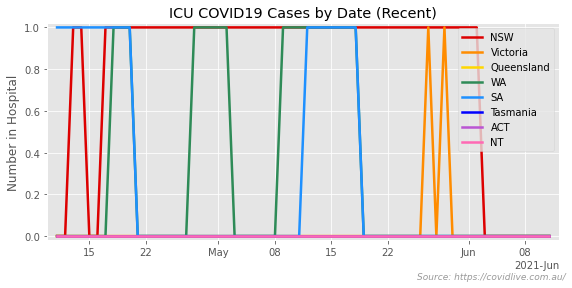

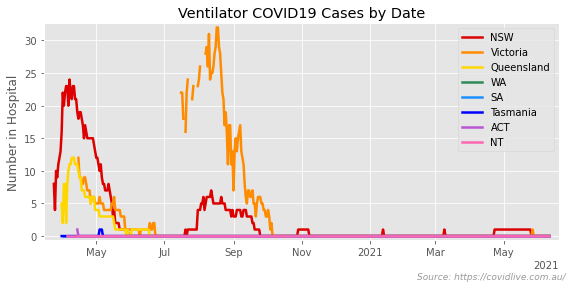

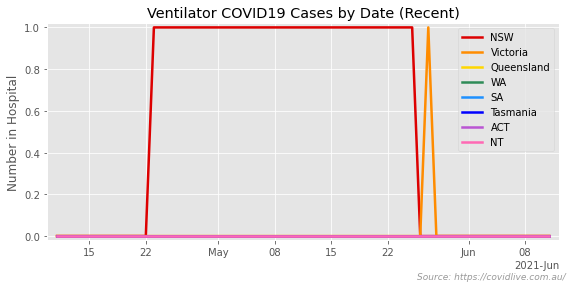

In [27]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)
idents = ['MED_HOSP_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT']
descs = ['Hospitalised', 'ICU', 'Ventilator']

for ident, desc in zip(idents, descs):

    hospital = get_table(frame_data, ident)
    hospital.index = pd.DatetimeIndex(hospital.index)
    hospital = hospital.dropna(axis=0, how='all')

    # bar chart of latest data
    latest = hospital.copy()
    if latest.iloc[-1].isna().any():
        latest.drop(latest.index[-1], inplace=True)
    row = latest.iloc[-1].astype(int)
    if row.sum() > 0:
        lfooter = str(row.name.date())
        title = f'{desc} COVID19 Cases'
        ps.plot_barh(row.sort_values(ascending=True), 
                     title=title,
                     xlabel=f'Currently {desc} cases',
                     save_as = f'{CHART_DIRECTORY}{title}.png',
                     rfooter=SOURCE,
                     lfooter=lfooter,
                     show=True,
                    )
    
    # plot hospitalised as a line chart
    for start in [0, -RECENT]:
        dataset = hospital.iloc[start:]
        if dataset.sum().sum() == 0:
            continue
        fig, ax = plt.subplots()
        ax.xaxis_date()
        ax.margins(0.02)
        for state in order:
            ax.plot(dataset.index, 
                    dataset[state], 
                    label=state, lw=2.5)
        ax.legend(loc='best')

        title = f'{desc} COVID19 Cases by Date'
        if start == -RECENT:
            title += ' (Recent)'
        ps.finalise_plot(ax, 
                         title=title, 
                         chart_directory=CHART_DIRECTORY,
                         xlabel=None,
                         ylabel='Number in Hospital',
                         rfooter=SOURCE,
                         show=True,
                        )

## The End

In [28]:
print('Finished')

if warning_count:
    print(f'Check {warning_count} '
          f'warning{"s" if warning_count > 1 else ""} above:')
    print_warinings()

Finished
Check 1 warning above:
It looks like we might be missing the latest TEST_CNT for ['SA', 'WA']
